In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [3]:
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [4]:
# Importing the dataset
df = pd.read_csv("/content/drive/MyDrive/Dockeree/Doceree-HCP_Train.csv",encoding = "ISO-8859-1")
print(len(df))
df.index=df.ID

113937


In [5]:
# Importing the dataset
df_test = pd.read_csv("/content/drive/MyDrive/Dockeree/Doceree-HCP_Test.csv")
df_test.index=df_test.ID
len(df_test)

28493

### EDA


In [6]:
df['TAXONOMY'].value_counts()

2084P0800X    7930
2084N0400X    6621
207Q00000X    3997
207R00000X    3190
208000000X     837
              ... 
163WC0400X       1
246QM0706X       1
1835N1003X       1
207RI0008X       1
207XX0801X       1
Name: TAXONOMY, Length: 207, dtype: int64

In [7]:
df['TAXONOMY'].value_counts().sum()

32313

In [8]:
df['TAXONOMY'].isna().sum()

81624

In [9]:
df['PLATFORMTYPE'].unique()

array(['Online Medical Journal', 'Online Learning Portal',
       'Medical News Platform', 'Electronic Health Record',
       'Tele-medicine Platform'], dtype=object)

<Axes: >

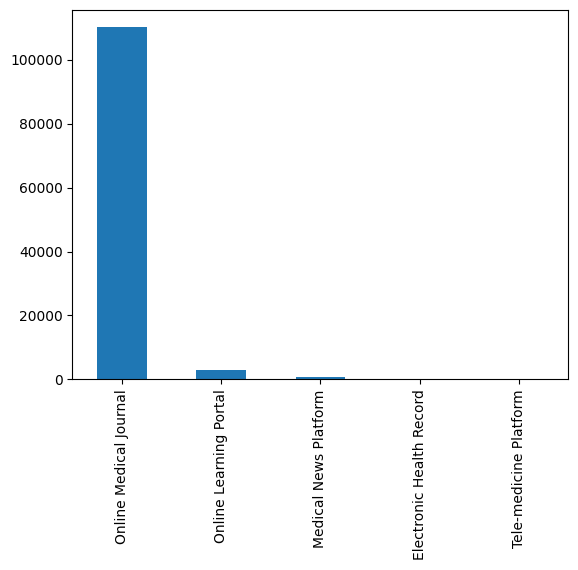

In [10]:
df['PLATFORMTYPE'].value_counts().plot(kind="bar")
#bar_graph('PLATFORMTYPE')

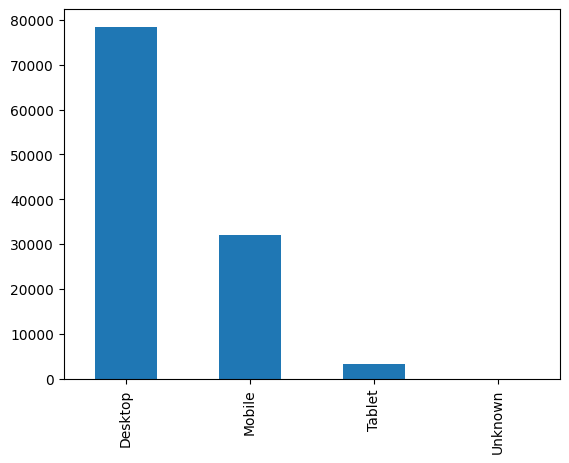

In [11]:
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")
bar_graph('DEVICETYPE')

In [12]:
# Preprocess the text data
sentences = df['KEYWORDS'].apply(lambda x: x.split("|"))
sentences

ID
1001      [General, Endocrine, False, Medicine, Surgery,...
1002      [Bone Marrow, Radiography, Chronic, Oncology, ...
1003      [General, Endocrine, False, Medicine, Surgery,...
1004      [Dental, Total, Clinical, Pharmacology, Physic...
1005      [Critical Care, Emergency Medicine, General Pr...
                                ...                        
114933    [Cardiovascular, Clinical, False, Male, Oncolo...
114934    [Asthma, Arthritis, General, Clinical, Diagnos...
114935    [Rehabilitation, Transplantation, Clinical, Pr...
114936    [pain, disease, autoimmune, multiple sclerosis...
114937    [Genetic, Large, Autoimmune, Health, False, Ab...
Name: KEYWORDS, Length: 113937, dtype: object

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


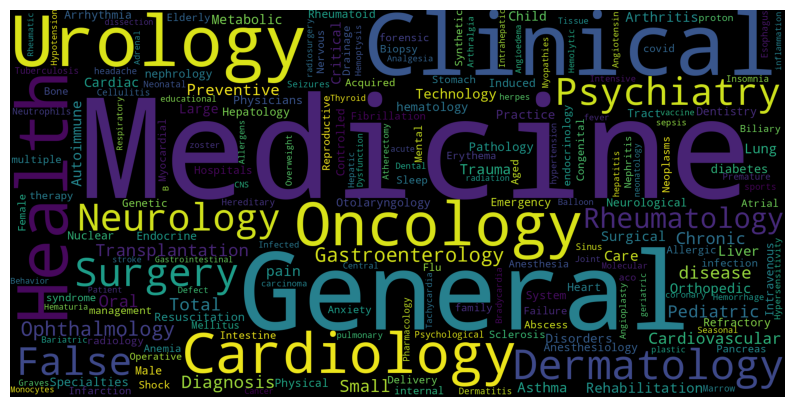

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud

stop_words = set(stopwords.words('english'))

all_words = list([a for b in sentences.tolist() for a in b])
all_words_str = ' '.join(all_words)

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud)
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black',
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

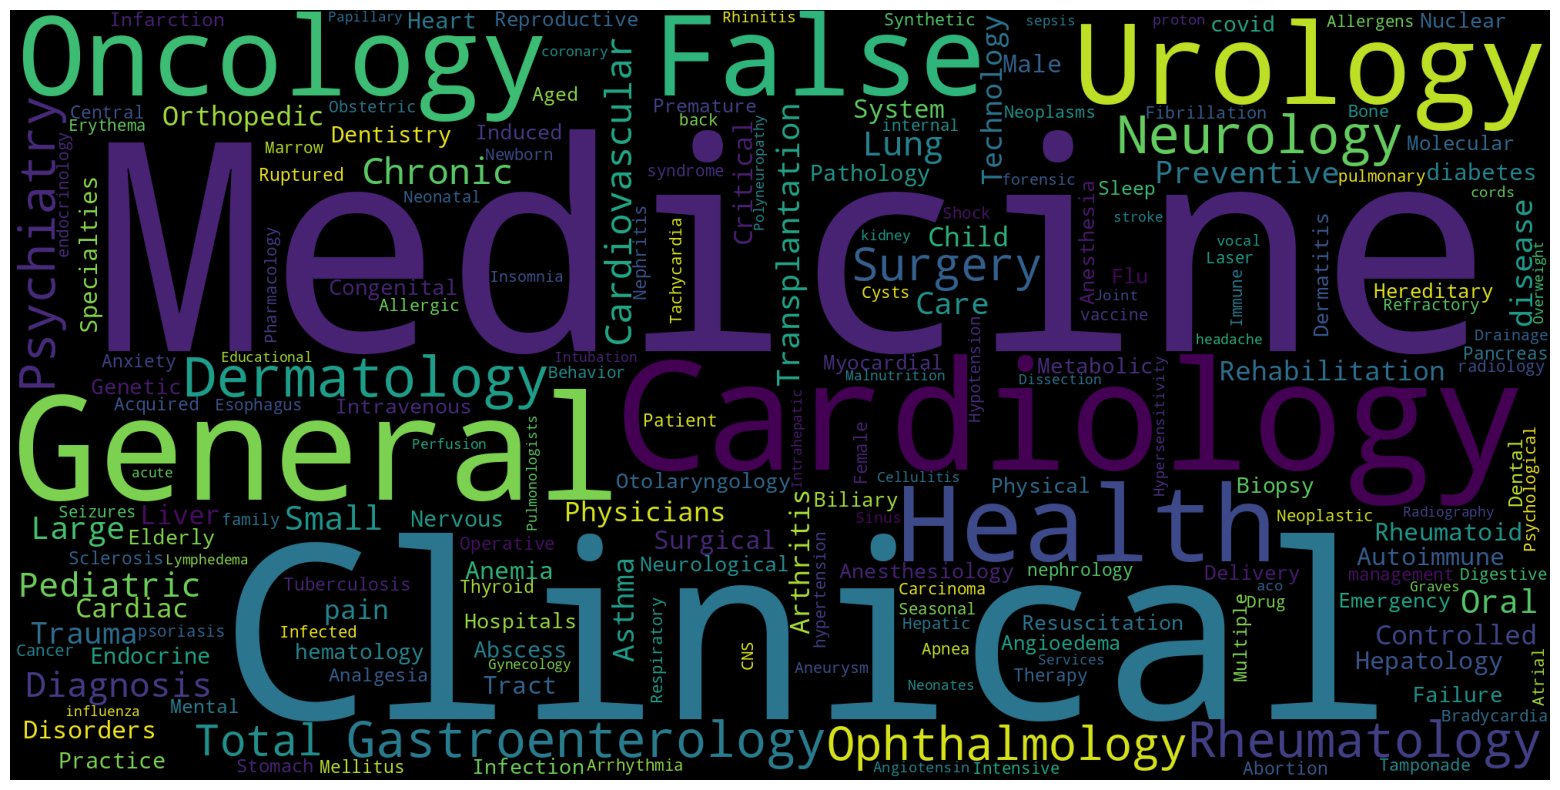

In [14]:
import matplotlib.pyplot as plt

stop_words = set(stopwords.words('english'))

# Filter the sentences based on IS_HCP=1 condition
hcp_sentences = sentences[df['IS_HCP'] == 1]

# Concatenate the sentences into a single string
all_words = list([a for b in hcp_sentences.tolist() for a in b])
all_words_str = ' '.join(all_words)

def plot_cloud(wordcloud):
    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud)
    plt.axis("off")

wordcloud = WordCloud(width=2000, height=1000, random_state=1, background_color='black',
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

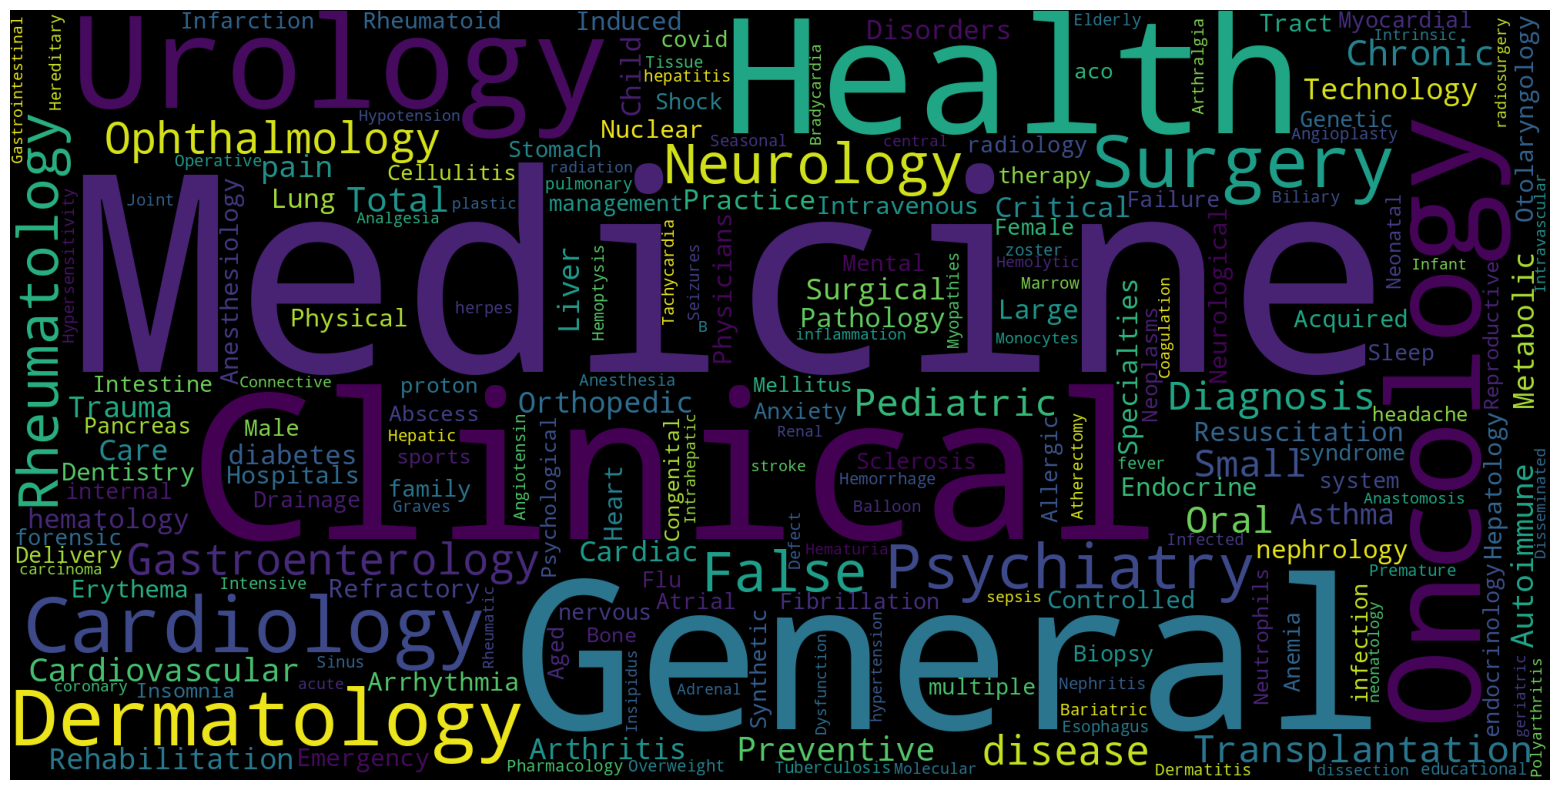

In [15]:
stop_words = set(stopwords.words('english'))

# Filter the sentences based on IS_HCP=1 condition
hcp_sentences = sentences[df['IS_HCP'] == 0]

# Concatenate the sentences into a single string
all_words = list([a for b in hcp_sentences.tolist() for a in b])
all_words_str = ' '.join(all_words)

def plot_cloud(wordcloud):
    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud)
    plt.axis("off")

wordcloud = WordCloud(width=2000, height=1000, random_state=1, background_color='black',
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

In [16]:
df['USERZIPCODE'].fillna(df["USERZIPCODE"].mode()[0],inplace=True)
df['USERCITY'].fillna("UNKNOWN",inplace=True)

df_test['USERZIPCODE'].fillna(df["USERZIPCODE"].mode()[0],inplace=True)
df_test['USERCITY'].fillna("UNKNOWN",inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113937 entries, 1001 to 114937
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               113937 non-null  int64  
 1   DEVICETYPE       113937 non-null  object 
 2   PLATFORM_ID      113937 non-null  int64  
 3   BIDREQUESTIP     113937 non-null  object 
 4   USERPLATFORMUID  113933 non-null  object 
 5   USERCITY         113937 non-null  object 
 6   USERZIPCODE      113937 non-null  float64
 7   USERAGENT        113935 non-null  object 
 8   PLATFORMTYPE     113937 non-null  object 
 9   CHANNELTYPE      113937 non-null  object 
 10  URL              113937 non-null  object 
 11  KEYWORDS         113937 non-null  object 
 12  TAXONOMY         32313 non-null   object 
 13  IS_HCP           113936 non-null  float64
dtypes: float64(2), int64(2), object(10)
memory usage: 13.0+ MB


In [17]:
df = df.dropna(subset=['IS_HCP'])

In [18]:
df['IS_HCP'].value_counts()

0.0    79756
1.0    34180
Name: IS_HCP, dtype: int64

In [19]:
# Handling missing values in 'Taxonomy' based on 'IS_HCP' values
df.loc[df['IS_HCP'] == 0, 'TAXONOMY'] = df.loc[df['IS_HCP'] == 0, 'TAXONOMY'].fillna('Unknown')

# Optional: Replace NaN values for HCP with a placeholder if needed
df.loc[df['IS_HCP'] == 1, 'TAXONOMY'] = df.loc[df['IS_HCP'] == 1, 'TAXONOMY'].fillna('Not Applicable')

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder_tax = LabelEncoder()
df['TAXONOMY'] = label_encoder_tax.fit_transform(df['TAXONOMY'])

In [21]:
df.head()

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
ID,,,,,,,,,,,,,,
1001,1001,Desktop,2,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,208,0.0
1002,1002,Desktop,2,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/deci...,Bone Marrow|Radiography|Chronic|Oncology|Psych...,208,0.0
1003,1003,Desktop,2,66.232.79.22,a698de4b-e200-46dd-b5fb-40402175ae18,New Meadows,83654.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,208,0.0
1004,1004,Desktop,3,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,UNKNOWN,229114624.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://globalrph.com/medcalcs/warfarin-mainte...,Dental|Total|Clinical|Pharmacology|Physicians|...,149,1.0
1005,1005,Mobile,7,174.202.231.99,a17e25be-532d-4cf5-b916-9308c8c3961f,Houston,77008.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,Website,https://www.cureus.com/articles/58184-a-review...,Critical Care|Emergency Medicine|General Pract...,208,0.0


### Preparing DataSet for Model

In [22]:
x = df.iloc[:,:-1]

taxonomy = x
# print(len(df))
x = pd.concat([x, df_test],axis=0)
# print(len(df),len(x))
x

# taxonomy = x

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY
ID,,,,,,,,,,,,,
1001,1001,Desktop,2,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,208.0
1002,1002,Desktop,2,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/deci...,Bone Marrow|Radiography|Chronic|Oncology|Psych...,208.0
1003,1003,Desktop,2,66.232.79.22,a698de4b-e200-46dd-b5fb-40402175ae18,New Meadows,83654.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,208.0
1004,1004,Desktop,3,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,UNKNOWN,229114624.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://globalrph.com/medcalcs/warfarin-mainte...,Dental|Total|Clinical|Pharmacology|Physicians|...,149.0
1005,1005,Mobile,7,174.202.231.99,a17e25be-532d-4cf5-b916-9308c8c3961f,Houston,77008.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,Website,https://www.cureus.com/articles/58184-a-review...,Critical Care|Emergency Medicine|General Pract...,208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143989,143989,Desktop,2,69.202.233.241,78ce4bbe-3885-4c14-b945-a0ea1e4574f4,Brooklyn,11215.0,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,Online Medical Journal,Website,https://www.renalandurologynews.com/home/news/...,Transplantation|Psychiatry|Heart Failure|Angio...,NaN
143990,143990,Desktop,7,75.4.190.65,a53799e1-b279-40cf-b467-11b4d659e325,Miami,33178.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cureus.com/publish/articles/144818...,small|hospitals|nephrology|emergency medicine|...,NaN
143991,143991,Desktop,7,137.52.180.45,acc732a8-2ee9-4e2c-9933-70e34db48101,Fort Lauderdale,33314.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cureus.com/registrations/continue?...,small|hospitals|nephrology|emergency medicine|...,NaN


In [23]:
df.shape

(113936, 14)

In [24]:
taxonomy.shape

(113936, 13)

In [25]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
label_encoder=LabelEncoder()

x['DEVICETYPE']= label_encoder.fit_transform(x['DEVICETYPE'])
x['PLATFORMTYPE']= label_encoder.fit_transform(x['PLATFORMTYPE'])
x['USERAGENT']= label_encoder.fit_transform(x['USERAGENT'])
x['CHANNELTYPE']= label_encoder.fit_transform(x['CHANNELTYPE'])
x['DEVICETYPE']= label_encoder.fit_transform(x['DEVICETYPE'])
x['URL']= label_encoder.fit_transform(x['URL'])
x['KEYWORDS']= label_encoder.fit_transform(x['KEYWORDS'])
x['USERCITY']= label_encoder.fit_transform(x['USERCITY'])
x['BIDREQUESTIP']= label_encoder.fit_transform(x['BIDREQUESTIP'])
x['USERPLATFORMUID']= label_encoder.fit_transform(x['USERPLATFORMUID'])


# x.drop("DEVICETYPE",inplace=True,axis=1)
# x.drop("BIDREQUESTIP",inplace=True,axis=1)
# x.drop("USERPLATFORMUID",inplace=True,axis=1)
# x.drop("URL",inplace=True,axis=1)
# x.drop("USERZIPCODE",inplace=True,axis=1)
x

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY
ID,,,,,,,,,,,,,
1001,1001,0,2,7194,26134,3276,97206.0,3100,3,0,746,474,208.0
1002,1002,0,2,21236,47842,132,22202.0,2913,3,0,789,111,208.0
1003,1003,0,2,21730,41220,2783,83654.0,2913,3,0,746,474,208.0
1004,1004,0,3,4614,17268,4124,229114624.0,3191,3,0,394,282,149.0
1005,1005,1,7,11084,39893,1821,77008.0,4371,3,0,1764,266,208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143989,143989,0,2,24832,29846,477,11215.0,2949,3,0,5225,1058,NaN
143990,143990,0,7,32308,40859,2524,33178.0,3068,3,0,1995,2229,NaN
143991,143991,0,7,4602,42743,1354,33314.0,2863,3,0,2101,2233,NaN


In [26]:
from sklearn.model_selection import train_test_split
X_TEST = x.iloc[113936:]

x = x.iloc[:113936]
y = df.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.2)

x['USERZIPCODE'].fillna(X_train.USERZIPCODE.mode()[0], inplace=True)
x

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY
ID,,,,,,,,,,,,,
1001,1001,0,2,7194,26134,3276,97206.0,3100,3,0,746,474,208.0
1002,1002,0,2,21236,47842,132,22202.0,2913,3,0,789,111,208.0
1003,1003,0,2,21730,41220,2783,83654.0,2913,3,0,746,474,208.0
1004,1004,0,3,4614,17268,4124,229114624.0,3191,3,0,394,282,149.0
1005,1005,1,7,11084,39893,1821,77008.0,4371,3,0,1764,266,208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114933,114933,0,2,24280,1271,3163,19120.0,2828,3,0,908,154,69.0
114934,114934,0,2,485,12564,4161,914014213.0,3265,3,0,943,69,149.0
114935,114935,0,7,11676,38656,4124,98105.0,2891,3,0,1705,949,112.0


In [27]:
X_TEST

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY
ID,,,,,,,,,,,,,
115501,115501,0,2,32162,3285,1290,28305.0,2706,3,0,941,420,NaN
115502,115502,1,2,16246,49642,826,16316.0,4159,3,0,4740,464,NaN
115503,115503,0,2,7459,15080,881,91724.0,2863,3,0,4778,0,NaN
115504,115504,0,7,25935,15468,477,11226.0,2899,3,0,1440,545,NaN
115505,115505,0,2,30842,58517,2399,30062.0,3011,3,0,5164,1153,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143989,143989,0,2,24832,29846,477,11215.0,2949,3,0,5225,1058,NaN
143990,143990,0,7,32308,40859,2524,33178.0,3068,3,0,1995,2229,NaN
143991,143991,0,7,4602,42743,1354,33314.0,2863,3,0,2101,2233,NaN


### Logistic Regression

In [28]:
# Train a logistic regression model
l_model = LogisticRegression()
l_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = l_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nConfusion Matrix: ")
confusion_matrix(y_test, y_pred)

Accuracy: 0.9090749517289801

Confusion Matrix: 


array([[15649,   271],
       [ 1801,  5067]])

In [29]:
# k = l_model.predict(X_TEST)

# k = pd.DataFrame({'ID':df_test.ID,'IS_HCP':k})
# k.to_csv("output-Logistic.csv",index=False)
# k.columns

### Decision Tree

In [30]:
# Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier

d_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth=15)
d_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = d_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nConfusion Matrix: ")
confusion_matrix(y_test, y_pred)

Accuracy: 1.0

Confusion Matrix: 


array([[15920,     0],
       [    0,  6868]])

In [31]:
# k = d_classifier.predict(X_TEST)

# k = pd.DataFrame({'ID':df_test.ID,'IS_HCP':k})
# k.to_csv("output-DClass.csv",index=False)
# k.columns

### XGBoost

In [32]:
from xgboost import XGBClassifier

bst = XGBClassifier(n_estimators=500, n_jobs=80, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
y_pred = bst.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nConfusion Matrix: ")
confusion_matrix(y_test, y_pred)

Accuracy: 1.0

Confusion Matrix: 


array([[15920,     0],
       [    0,  6868]])

In [33]:
xgOutput = bst.predict(X_TEST)

output = pd.DataFrame({'ID':df_test.ID,'IS_HCP':xgOutput})
output.to_csv("output-XGBoost.csv",index=False)
output.columns

Index(['ID', 'IS_HCP'], dtype='object')

In [34]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import StratifiedKFold
# import matplotlib.pyplot as plt
# from sklearn.model_selection import RandomizedSearchCV

# model = XGBClassifier()
# n_estimators = range(100, 800, 100)
# param_grid = dict(n_estimators=n_estimators)
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
# random_search = RandomizedSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=80, cv=kfold)
# random_result = random_search.fit(X_train, y_train)

# # summarize results
# print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
# means = random_result.cv_results_['mean_test_score']
# stds = random_result.cv_results_['std_test_score']
# params = random_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#  print("%f (%f) with: %r" % (mean, stdev, param))

# # plot
# plt.errorbar(n_estimators, means, yerr=stds)
# plt.title("XGBoost n_estimators vs Log Loss")
# plt.xlabel('n_estimators')
# plt.ylabel('Log Loss')

In [35]:
# from xgboost import XGBClassifier

# n_esti = 1000

# bst = XGBClassifier(n_estimators=n_esti, n_jobs=80)
# # fit model
# bst.fit(X_train, y_train)
# # make predictions
# y_pred = bst.predict(X_test)

# # Evaluate the model's performance
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# print("\nConfusion Matrix: ")
# confusion_matrix(y_test, y_pred)

# k = bst.predict(X_TEST)

# k = pd.DataFrame({'ID':df_test.ID,'IS_HCP':k})
# k.to_csv(f"output-XGBoost-{n_esti}.csv",index=False)
# k.columns

### Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion="entropy", n_estimators=500, n_jobs=80)
model.fit(x, y)

from sklearn.metrics import accuracy_score

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nConfusion Matrix: ")
confusion_matrix(y_test, y_pred)

Accuracy: 1.0

Confusion Matrix: 


array([[15920,     0],
       [    0,  6868]])

In [37]:
# k = model.predict(X_TEST)

# k = pd.DataFrame({'ID':df_test.ID,'IS_HCP':k})
# k.to_csv("output-randomForest.csv",index=False)
# k.columns

In [38]:
# # Save the predictions to a file
# predictions_df = pd.DataFrame({'ID': df_test['ID'], 'IS_HCP':k})
# predictions_df.to_csv('submissions.csv', index=False)

### Taxonomy

In [39]:
df1 = pd.read_csv('/content/drive/MyDrive/Dockeree/Doceree-HCP_Train.csv' ,encoding = "ISO-8859-1")
df2 = pd.read_csv('/content/drive/MyDrive/Dockeree/Doceree-HCP_Test.csv')

In [40]:
df1.head()

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
0,1001,Desktop,2,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
1,1002,Desktop,2,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/deci...,Bone Marrow|Radiography|Chronic|Oncology|Psych...,NaN,0.0
2,1003,Desktop,2,66.232.79.22,a698de4b-e200-46dd-b5fb-40402175ae18,New Meadows,83654.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
3,1004,Desktop,3,137.54.125.246,45967533-75c8-4fbd-a00c-e6ff20447aaa,NaN,229114624.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://globalrph.com/medcalcs/warfarin-mainte...,Dental|Total|Clinical|Pharmacology|Physicians|...,2084P0800X,1.0
4,1005,Mobile,7,174.202.231.99,a17e25be-532d-4cf5-b916-9308c8c3961f,Houston,77008.0,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,Online Medical Journal,Website,https://www.cureus.com/articles/58184-a-review...,Critical Care|Emergency Medicine|General Pract...,NaN,0.0


In [41]:
len(df1), len(df2)

(113937, 28493)

In [42]:
concat = pd.concat([df1, df2], axis = 0)
print(len(concat))

142430


In [43]:
concat = concat.drop(columns=['USERCITY', 'USERZIPCODE'])

from sklearn import preprocessing
sti = preprocessing.LabelEncoder()
enc_df = concat.apply(sti.fit_transform)
enc_df

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
0,0,0,1,7194,26134,3100,3,0,746,475,207,0
1,1,0,1,21236,47842,2913,3,0,789,112,207,0
2,2,0,1,21730,41220,2913,3,0,746,475,207,0
3,3,0,2,4614,17268,3191,3,0,394,283,149,1
4,4,1,6,11084,39893,4371,3,0,1764,267,207,0
...,...,...,...,...,...,...,...,...,...,...,...,...
28488,142425,0,1,24832,29846,2949,3,0,5225,1059,207,2
28489,142426,0,6,32308,40859,3068,3,0,1995,2230,207,2
28490,142427,0,6,4602,42743,2863,3,0,2101,2234,207,2
28491,142428,0,7,21781,54644,2264,3,0,414,2471,207,2


In [44]:
train_df = enc_df[0 : len(df1)]
train_df

featured_cols = ['DEVICETYPE', 'PLATFORM_ID', 'BIDREQUESTIP', 'USERPLATFORMUID', 'USERAGENT', 'PLATFORMTYPE', 'URL', 'KEYWORDS']

In [45]:
test_df = enc_df[len(df1) : ]
test_df = test_df[featured_cols]
test_df

,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERAGENT,PLATFORMTYPE,URL,KEYWORDS
0,0,1,32162,3285,2706,3,941,421
1,1,1,16246,49642,4159,3,4740,465
2,0,1,7459,15080,2863,3,4778,0
3,0,6,25935,15468,2899,3,1440,546
4,0,1,30842,58517,3011,3,5164,1154
...,...,...,...,...,...,...,...,...
28488,0,1,24832,29846,2949,3,5225,1059
28489,0,6,32308,40859,3068,3,1995,2230
28490,0,6,4602,42743,2863,3,2101,2234
28491,0,7,21781,54644,2264,3,414,2471


In [46]:
x = train_df[featured_cols]
y = train_df['TAXONOMY']
x.head()

,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERAGENT,PLATFORMTYPE,URL,KEYWORDS
0,0,1,7194,26134,3100,3,746,475
1,0,1,21236,47842,2913,3,789,112
2,0,1,21730,41220,2913,3,746,475
3,0,2,4614,17268,3191,3,394,283
4,1,6,11084,39893,4371,3,1764,267


In [47]:
model = RandomForestClassifier(n_estimators=200, criterion="entropy")
model.fit(x, y)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [48]:
layer_data = test_df
y_pred_tax = model.predict(layer_data)
len(y_pred_tax)

28493

In [49]:
le = preprocessing.LabelEncoder()
le.fit(df['TAXONOMY'])
decoded_labels = le.inverse_transform(y_pred_tax)
print(decoded_labels)

[207 149 207 ... 207 207 207]


In [50]:
result = pd.DataFrame({'ID': df2['ID'],'TAXONOMY': decoded_labels})
result

,ID,TAXONOMY
0,115501,207
1,115502,149
2,115503,207
3,115504,207
4,115505,149
...,...,...
28488,143989,207
28489,143990,207
28490,143991,207
28491,143992,207


In [51]:
result.to_csv('TAXONOMY_output.csv', index = False)

In [52]:
result['TAXONOMY'].value_counts()

207    21044
149     2268
143     1676
43       890
50       623
       ...  
49         1
85         1
22         1
120        1
195        1
Name: TAXONOMY, Length: 128, dtype: int64